In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Compare different factors in the California housing dataset

In [2]:
# Read in the California housing dataset
california_dataset = datasets.fetch_california_housing()
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target

In [3]:
housing_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')

In [4]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
housing_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [6]:
# Reduce the dataset to remove AveRooms outliers
housing_data_reduced = pd.DataFrame(housing_data.loc[housing_data['AveRooms']<10,:])

# Reduce the dataset to the San Diego Area (based on approx latitude & longitude area)
san_diego_housing = pd.DataFrame(housing_data_reduced.loc[((housing_data_reduced['Latitude']>32.664282) & 
                                                          (housing_data_reduced['Latitude']<32.980514) &
                                                          (housing_data_reduced['Longitude']>-117.300418) &
                                                          (housing_data_reduced['Longitude']<-117.01950)),:])

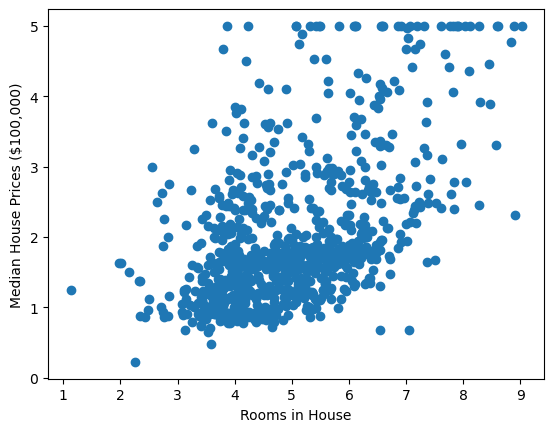

In [7]:
# Plot out rooms versus median house price
x = san_diego_housing['AveRooms']
y = san_diego_housing['MEDV']
plt.scatter(x, y)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

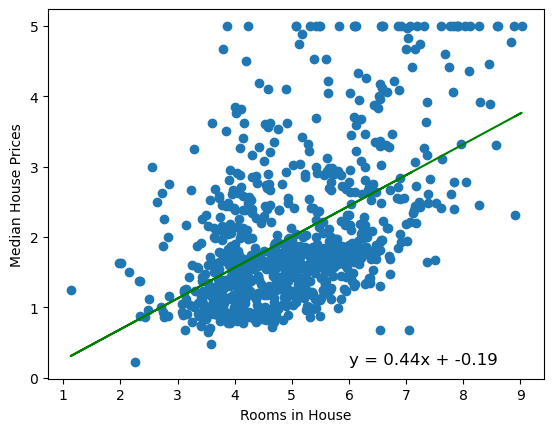

In [11]:
# Add the linear regression equation and line to plot
m, b, corr, pvalue, stderr = linregress(x, y)
x = san_diego_housing['AveRooms']
y = san_diego_housing['MEDV']
y_line = m*x + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

plt.scatter(x, y)
plt.plot(x, y_line, "g-")
plt.annotate(line_eq, (6, 0.2), fontsize=12)
plt.xlabel("Rooms in House")
plt.ylabel("Median House Prices")
plt.show()

The r-squared is: 0.2774857282821741


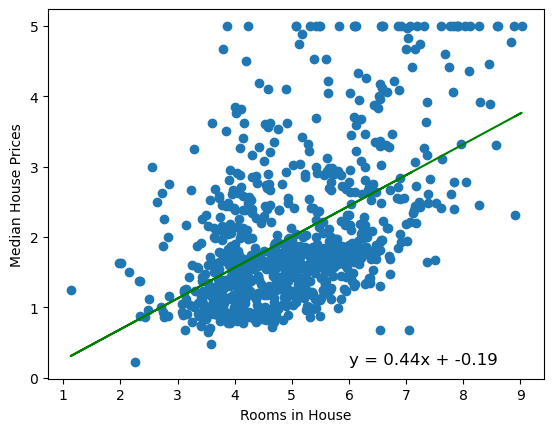

In [12]:
# Print out the r-squared value along with the plot.
m, b, corr, pvalue, stderr = linregress(x, y)
x = san_diego_housing['AveRooms']
y = san_diego_housing['MEDV']
y_line = m*x + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

plt.scatter(x, y)
plt.plot(x, y_line, "g-")
plt.annotate(line_eq, (6, 0.2), fontsize=12)
plt.xlabel("Rooms in House")
plt.ylabel("Median House Prices")
print(f"The r-squared is: {corr**2}")
plt.show()